In [246]:
import pandas as pd
from os import path
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches # for drawing shapes

import seaborn as sns

%config InlineBackend.figure_format = 'retina'

In [2]:
files = os.listdir(os.getcwd() + "/OULAD/")

In [3]:
files

['studentAssessment.csv',
 'studentInfo.csv',
 'OULAD.names',
 'studentVle.csv',
 'model.png',
 'adobe_oulad_challenge - Jupyter Notebook_files',
 'adobe_oulad_challenge - Jupyter Notebook.htm',
 'courses.csv',
 'vle.csv',
 'studentRegistration.csv',
 'assessments.csv']

In [540]:
student_assessement = pd.read_csv(os.getcwd() + "/OULAD/studentAssessment.csv")

student_info = pd.read_csv(os.getcwd() + "/OULAD/studentInfo.csv")

student_vle = pd.read_csv(os.getcwd() + "/OULAD/studentVle.csv")

student_registration = pd.read_csv(os.getcwd() + "/OULAD/studentRegistration.csv")

courses = pd.read_csv(os.getcwd() + "/OULAD/courses.csv")

vle = pd.read_csv(os.getcwd() + "/OULAD/vle.csv")

assessments = pd.read_csv(os.getcwd() + "/OULAD/assessments.csv")

In [5]:
vle.head()

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,?,?
1,546712,AAA,2013J,oucontent,?,?
2,546998,AAA,2013J,resource,?,?
3,546888,AAA,2013J,url,?,?
4,547035,AAA,2013J,resource,?,?


In [6]:
vle.shape

(6364, 6)

In [7]:
vle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6364 entries, 0 to 6363
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id_site            6364 non-null   int64 
 1   code_module        6364 non-null   object
 2   code_presentation  6364 non-null   object
 3   activity_type      6364 non-null   object
 4   week_from          6364 non-null   object
 5   week_to            6364 non-null   object
dtypes: int64(1), object(5)
memory usage: 298.4+ KB


In [8]:
vle['activity_type'].value_counts()

resource          2660
subpage           1055
oucontent          996
url                886
forumng            194
quiz               127
page               102
oucollaborate       82
questionnaire       61
ouwiki              49
dataplus            28
externalquiz        26
homepage            22
glossary            21
ouelluminate        21
dualpane            20
repeatactivity       5
htmlactivity         4
sharedsubpage        3
folder               2
Name: activity_type, dtype: int64

In [9]:

vle[vle['activity_type']=='resource']['week_from'].value_counts()

?     2512
18      20
1       14
13      13
4       12
14       9
15       7
3        7
2        7
28       7
9        5
27       5
21       4
29       4
5        4
8        4
11       4
23       2
7        2
19       2
24       2
10       2
22       2
6        2
25       2
20       2
26       1
17       1
12       1
16       1
Name: week_from, dtype: int64

In [10]:
courses.sort_values(by='module_presentation_length', ascending=False)

,code_module,code_presentation,module_presentation_length
20,GGG,2014J,269
6,CCC,2014J,269
16,FFF,2014J,269
1,AAA,2014J,269
13,EEE,2014J,269
0,AAA,2013J,268
15,FFF,2013J,268
2,BBB,2013J,268
12,EEE,2013J,268
3,BBB,2014J,262


In [11]:
courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   code_module                 22 non-null     object
 1   code_presentation           22 non-null     object
 2   module_presentation_length  22 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 656.0+ bytes


In [12]:
assessments.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19,10.0
1,AAA,2013J,1753,TMA,54,20.0
2,AAA,2013J,1754,TMA,117,20.0
3,AAA,2013J,1755,TMA,166,20.0
4,AAA,2013J,1756,TMA,215,30.0


In [13]:
student_info.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


In [14]:
# Number o funique student_ids
print("Number of unique student ids:", len(student_info.id_student.unique()))

Number of unique student ids: 28785


In [15]:
student_info['highest_education'].value_counts()

A Level or Equivalent          14045
Lower Than A Level             13158
HE Qualification                4730
No Formal quals                  347
Post Graduate Qualification      313
Name: highest_education, dtype: int64

In [16]:
student_info.groupby(['age_band', 'highest_education']).size()

age_band  highest_education          
0-35      A Level or Equivalent          10624
          HE Qualification                2612
          Lower Than A Level              9311
          No Formal quals                  294
          Post Graduate Qualification      103
35-55     A Level or Equivalent           3381
          HE Qualification                1986
          Lower Than A Level              3814
          No Formal quals                   53
          Post Graduate Qualification      199
55<=      A Level or Equivalent             40
          HE Qualification                 132
          Lower Than A Level                33
          Post Graduate Qualification       11
dtype: int64

In [17]:
student_info['code_module'].value_counts()

BBB    7909
FFF    7762
DDD    6272
CCC    4434
EEE    2934
GGG    2534
AAA     748
Name: code_module, dtype: int64

In [18]:
student_assessement.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78
1,1752,28400,22,0,70
2,1752,31604,17,0,72
3,1752,32885,26,0,69
4,1752,38053,19,0,79


In [19]:
student_assessement.shape

(173912, 5)

In [20]:
student_registration.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159,?
1,AAA,2013J,28400,-53,?
2,AAA,2013J,30268,-92,12
3,AAA,2013J,31604,-52,?
4,AAA,2013J,32885,-176,?


In [21]:
student_registration.shape

(32593, 5)

In [22]:
student_vle.head()

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1


In [23]:
student_vle.shape

(10655280, 6)

#### Analysis plan

3 Hypotheses:
1. Student WIthdrawal rates:

Average XX%

Largest (X%) for course XXX
2. Students Fail rates
3. Continuing education (taking the next course)



- Distribution of outcomes
- Check how many students continue studies (Hypo

- Distribution of withdrawals by student characteristics
- Study vle activities: 
    - At what point do students withdraw
    - What is this vle about
    
    

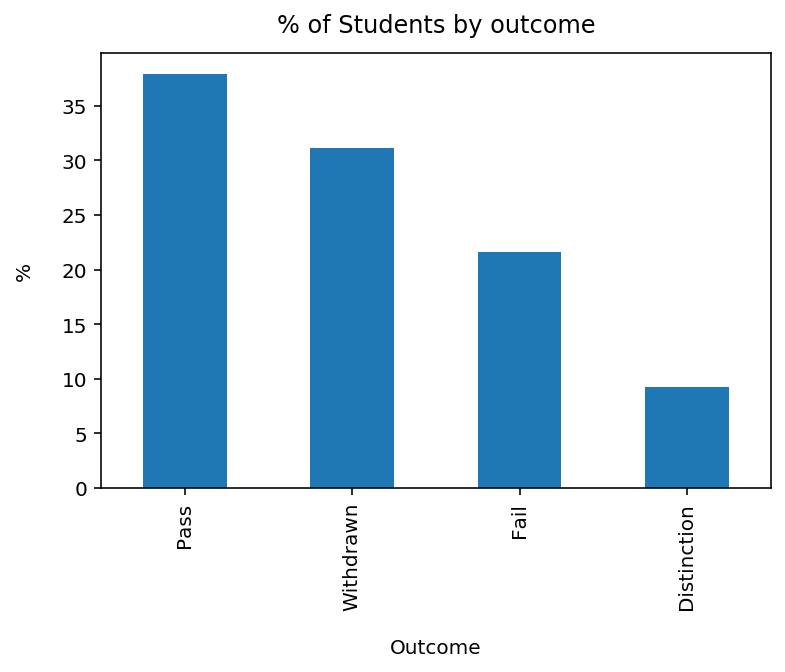

In [24]:
# Diistribution of outcomes
(student_info['final_result'].value_counts(normalize=True)*100).plot(kind= 'bar');
plt.xlabel("Outcome", labelpad=14)
plt.ylabel("%", labelpad=14)
plt.title("% of Students by outcome", y=1.02);


### EDA of Students Information

In [25]:
student_info['final_result'].value_counts(normalize=True)*100

Pass           37.925321
Withdrawn      31.160065
Fail           21.636548
Distinction     9.278066
Name: final_result, dtype: float64

In [26]:
student_registration[student_registration['date_unregistration']!='?'].shape[0]/student_registration.shape[0]*100

30.902340993464854

In [27]:
pd.crosstab(student_info['age_band'], student_info['highest_education'], margins=True, margins_name='subtotal')

highest_education,A Level or Equivalent,HE Qualification,Lower Than A Level,No Formal quals,Post Graduate Qualification,subtotal
age_band,,,,,,
0-35,10624,2612,9311,294,103,22944
35-55,3381,1986,3814,53,199,9433
55<=,40,132,33,0,11,216
subtotal,14045,4730,13158,347,313,32593


In [28]:
# Final results distribution within each education level
pd.crosstab(student_info['final_result'], student_info['highest_education'], margins=True, margins_name='subtotal', normalize='columns')

highest_education,A Level or Equivalent,HE Qualification,Lower Than A Level,No Formal quals,Post Graduate Qualification,subtotal
final_result,,,,,,
Distinction,0.106515,0.147357,0.055252,0.046110,0.281150,0.092781
Fail,0.192738,0.167019,0.260374,0.273775,0.108626,0.216365
Pass,0.413813,0.414376,0.333257,0.250720,0.373802,0.379253
Withdrawn,0.286935,0.271247,0.351117,0.429395,0.236422,0.311601


In [29]:
# Education levels distribution within each final results group
pd.crosstab(student_info['final_result'], student_info['highest_education'], margins=True, margins_name='subtotal', normalize='index')

highest_education,A Level or Equivalent,HE Qualification,Lower Than A Level,No Formal quals,Post Graduate Qualification
final_result,,,,,
Distinction,0.494709,0.230489,0.240410,0.005291,0.029101
Fail,0.383863,0.112025,0.485820,0.013471,0.004821
Pass,0.470188,0.158563,0.354745,0.007038,0.009465
Withdrawn,0.396810,0.126329,0.454904,0.014671,0.007286
subtotal,0.430921,0.145123,0.403706,0.010646,0.009603


In [30]:
student_info.region.value_counts()

Scotland                3446
East Anglian Region     3340
London Region           3216
South Region            3092
North Western Region    2906
West Midlands Region    2582
South West Region       2436
East Midlands Region    2365
South East Region       2111
Wales                   2086
Yorkshire Region        2006
North Region            1823
Ireland                 1184
Name: region, dtype: int64

In [31]:
# Final resuts vs number of previous attempts
pd.crosstab(student_info['final_result'], student_info['num_of_prev_attempts'], \
            margins=True, margins_name='subtotal', normalize='columns')



num_of_prev_attempts,0,1,2,3,4,5,6,subtotal
final_result,,,,,,,,
Distinction,0.100524,0.043346,0.032593,0.007042,0.000000,0.000000,0.25,0.092781
Fail,0.201647,0.305850,0.349630,0.401408,0.307692,0.461538,0.25,0.216365
Pass,0.392245,0.302213,0.251852,0.218310,0.333333,0.153846,0.00,0.379253
Withdrawn,0.305584,0.348590,0.365926,0.373239,0.358974,0.384615,0.50,0.311601


In [127]:
# Otcomes by courses
courses_outcomes = pd.crosstab(student_info['code_module'], student_info['final_result']).reset_index()
courses_outcomes.columns = [col.lower() for col in courses_outcomes.columns ]

In [128]:
courses_outcomes

,code_module,distinction,fail,pass,withdrawn
0,AAA,44,91,487,126
1,BBB,677,1767,3077,2388
2,CCC,498,781,1180,1975
3,DDD,383,1412,2227,2250
4,EEE,356,562,1294,722
5,FFF,670,1711,2978,2403
6,GGG,396,728,1118,292


In [130]:
def get_outcome_rates(df):
    df['total'] = df['distinction'] + df['fail'] + \
                    df['pass'] + df['withdrawn']

    df['withdrawal_rate'] = df['withdrawn']/df['total']
    df['fail_rate'] = df['fail']/df['total']
    df['pass_rate'] = df['pass']/df['total']
    df['distinction_rate'] = df['distinction']/df['total']
    
    return df

In [131]:
get_outcome_rates(courses_outcomes)

,code_module,distinction,fail,pass,withdrawn,total,withdrawal_rate,fail_rate,pass_rate,distinction_rate
0,AAA,44,91,487,126,748,0.168449,0.121658,0.651070,0.058824
1,BBB,677,1767,3077,2388,7909,0.301935,0.223416,0.389050,0.085599
2,CCC,498,781,1180,1975,4434,0.445422,0.176139,0.266125,0.112314
3,DDD,383,1412,2227,2250,6272,0.358737,0.225128,0.355070,0.061065
4,EEE,356,562,1294,722,2934,0.246080,0.191547,0.441036,0.121336
5,FFF,670,1711,2978,2403,7762,0.309585,0.220433,0.383664,0.086318
6,GGG,396,728,1118,292,2534,0.115233,0.287293,0.441200,0.156275


In [34]:
courses_outcomes['total'] = courses_outcomes['distinction'] + courses_outcomes['fail'] + \
                            courses_outcomes['pass'] + courses_outcomes['withdrawn']

courses_outcomes['withdrawal_rate'] = courses_outcomes['withdrawn']/courses_outcomes['total']
courses_outcomes['fail_rate'] = courses_outcomes['fail']/courses_outcomes['total']
courses_outcomes['pass_rate'] = courses_outcomes['pass']/courses_outcomes['total']
courses_outcomes['distinction_rate'] = courses_outcomes['distinction']/courses_outcomes['total']

In [132]:
courses_outcomes = courses_outcomes.sort_values(by = 'withdrawal_rate', ascending=False)

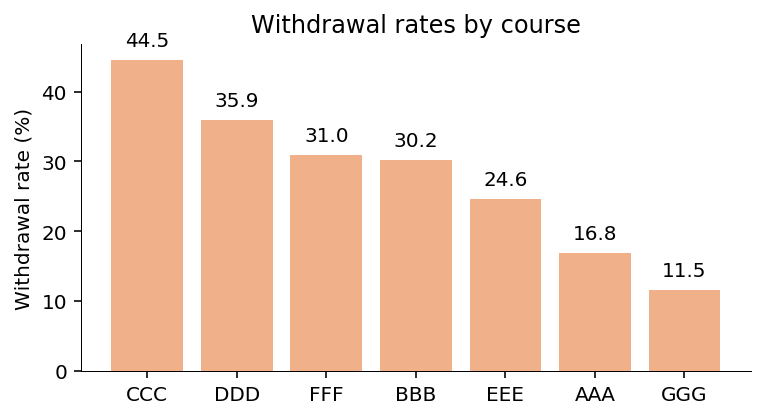

In [244]:
fig, ax = plt.subplots(figsize=(6,3))  # make one subplot (ax) on the figure
ax.bar( courses_outcomes['code_module'], courses_outcomes['withdrawal_rate']*100, color='#EFB08A')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(.5)
ax.spines['bottom'].set_linewidth(.5)
ax.set_ylabel("Withdrawal rate (%)")
ax.set_title('Withdrawal rates by course')
annotate(ax)
plt.show();

In [134]:
# Outcome rates by modules
modules_outcomes = pd.crosstab([student_info['code_module'], student_info['code_presentation']], student_info['final_result']).reset_index()
modules_outcomes.columns = [col.lower() for col in modules_outcomes.columns ]

In [142]:
modules_outcomes = get_outcome_rates(modules_outcomes)

In [143]:
modules_outcomes.sort_values(by='withdrawal_rate', ascending=False)

,code_module,code_presentation,distinction,fail,pass,withdrawn,total,withdrawal_rate,fail_rate,pass_rate,distinction_rate
6,CCC,2014B,192,375,471,898,1936,0.463843,0.193698,0.243285,0.099174
7,CCC,2014J,306,406,709,1077,2498,0.431145,0.162530,0.283827,0.122498
10,DDD,2014B,119,259,360,490,1228,0.399023,0.210912,0.293160,0.096906
18,FFF,2014J,258,393,859,855,2365,0.361522,0.166173,0.363214,0.109091
11,DDD,2014J,112,364,680,647,1803,0.358846,0.201886,0.377149,0.062119
9,DDD,2013J,98,428,731,681,1938,0.351393,0.220846,0.377193,0.050568
8,DDD,2013B,54,361,456,432,1303,0.331543,0.277053,0.349962,0.041443
5,BBB,2014J,180,391,972,749,2292,0.326789,0.170593,0.424084,0.078534
17,FFF,2014B,107,384,547,462,1500,0.308000,0.256000,0.364667,0.071333
4,BBB,2014B,166,396,561,490,1613,0.303782,0.245505,0.347799,0.102914


In [118]:
modules_outcomes['term']= modules_outcomes['code_presentation'].str.strip().str[-1]

In [ ]:
modules_outcomes

In [69]:
corr_rates = modules_outcomes[['withdrawal_rate', 'fail_rate', 'pass_rate', 'distinction_rate']].corr() ;

In [102]:
modules_outcomes.groupby('code_presentation')['withdrawn', 'fail', 'pass', 'distinction'].mean().reset_index()

<ipython-input-102-1a6b95c4390b>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  modules_outcomes.groupby('code_presentation')['withdrawn', 'fail', 'pass', 'distinction'].mean().reset_index()


,code_presentation,withdrawn,fail,pass,distinction
0,2013B,449.333333,413.666667,589.333333,109.000000
1,2013J,394.833333,333.500000,621.000000,124.833333
2,2014B,435.500000,305.500000,429.000000,130.666667
3,2014J,546.571429,282.428571,613.285714,166.285714


In [85]:
# Outcome rates by presentations
presentation_outcomes = pd.crosstab([student_info['code_presentation']], student_info['final_result']).reset_index()
presentation_outcomes.columns = [col.lower() for col in presentation_outcomes.columns ]


In [86]:
presentation_outcomes

,code_presentation,distinction,fail,pass,withdrawn
0,2013B,327,1241,1768,1348
1,2013J,749,2001,3726,2369
2,2014B,784,1833,2574,2613
3,2014J,1164,1977,4293,3826


In [145]:
presentation_outcomes = get_outcome_rates(presentation_outcomes)

In [146]:
presentation_outcomes = presentation_outcomes.sort_values(by='withdrawal_rate', ascending=False)

In [147]:
presentation_outcomes

,code_presentation,distinction,fail,pass,withdrawn,total,withdrawal_rate,fail_rate,pass_rate,distinction_rate
3,2014J,1164,1977,4293,3826,11260,0.339787,0.175577,0.381261,0.103375
2,2014B,784,1833,2574,2613,7804,0.334828,0.234880,0.329831,0.100461
0,2013B,327,1241,1768,1348,4684,0.287788,0.264944,0.377455,0.069812
1,2013J,749,2001,3726,2369,8845,0.267835,0.226230,0.421255,0.084681


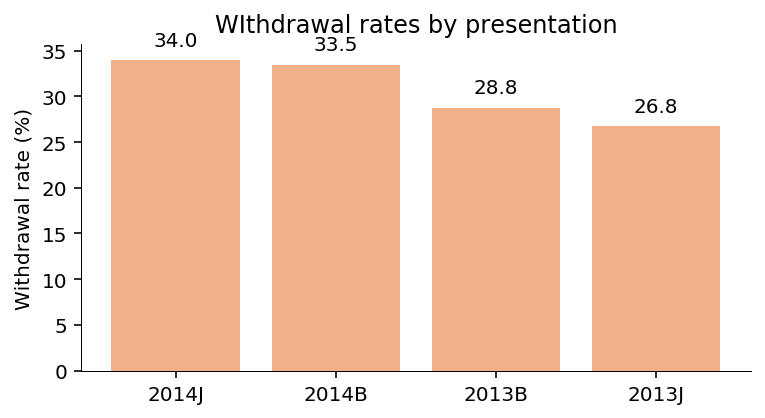

In [243]:
# Withdrawal rates 
fig, ax = plt.subplots(figsize=(6,3))  # make one subplot (ax) on the figure
ax.bar( presentation_outcomes['code_presentation'], presentation_outcomes['withdrawal_rate']*100, color='#EFB08A')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(.5)
ax.spines['bottom'].set_linewidth(.5)
ax.set_ylabel("Withdrawal rate (%)")

ax.set_title("WIthdrawal rates by presentation")
#ax.set_xticklabels([f'Cyl-{n}' for n in cyl])
annotate(ax)
plt.show();

In [123]:
#Outcome reates by term (J or B)

# Outcome rates by presentations
term_outcomes = pd.crosstab(student_info['code_presentation'].str.strip().str[-1], student_info['final_result']).reset_index()
term_outcomes.columns = [col.lower() for col in term_outcomes.columns ]


In [125]:
term_outcomes['total']

,code_presentation,distinction,fail,pass,withdrawn
0,B,1111,3074,4342,3961
1,J,1913,3978,8019,6195


In [141]:
get_outcome_rates(term_outcomes)

,code_presentation,distinction,fail,pass,withdrawn,total,withdrawal_rate,fail_rate,pass_rate,distinction_rate
0,B,1111,3074,4342,3961,12488,0.317184,0.246156,0.347694,0.088965
1,J,1913,3978,8019,6195,20105,0.308132,0.197861,0.398856,0.095150


In [40]:
student_info.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


### COURSE DESIGN EDA

In [107]:
courses.rename(columns = {'module_presentation_length':'course_length'}, inplace=True)

In [110]:
courses.groupby('code_module')['course_length'].mean().sort_values(ascending=False)

code_module
AAA    268.500000
EEE    259.333333
GGG    257.000000
CCC    255.000000
FFF    254.500000
DDD    251.000000
BBB    251.000000
Name: course_length, dtype: float64

In [111]:
courses.sort_values(by='course_length', ascending=False)

,code_module,code_presentation,course_length
20,GGG,2014J,269
6,CCC,2014J,269
16,FFF,2014J,269
1,AAA,2014J,269
13,EEE,2014J,269
0,AAA,2013J,268
15,FFF,2013J,268
2,BBB,2013J,268
12,EEE,2013J,268
3,BBB,2014J,262


In [149]:
courses['term'] = courses['code_presentation'].str.strip().str[-1]

In [242]:
def annotate(ax, space=5):
    '''Add labels at the end of a bar chart'''
    for rect in ax.patches:
            # Get X and Y placement of label from rect.
            y_value = rect.get_height()
            x_value = rect.get_x() + rect.get_width() / 2

            # Number of points between bar and label. Change to your liking.
            space = space
            # Vertical alignment for positive values
            va = 'bottom'

            # If value of bar is negative: Place label below bar
            if y_value < 0:
                # Invert space to place label below
                space *= -1
                # Vertically align label at top
                va = 'top'

            # Use Y value as label and format number with one decimal place
            label = "{:.1f}".format(y_value)

            # Create annotation
            ax.annotate(
                label,                      # Use `label` as label
                (x_value, y_value),         # Place label at end of the bar
                xytext=(0, space),          # Vertically shift label by `space`
                textcoords="offset points", # Interpret `xytext` as offset in points
                ha='center',                # Horizontally center label
                va=va)                      # Vertically align label differently for
                                            # positive and negative values.

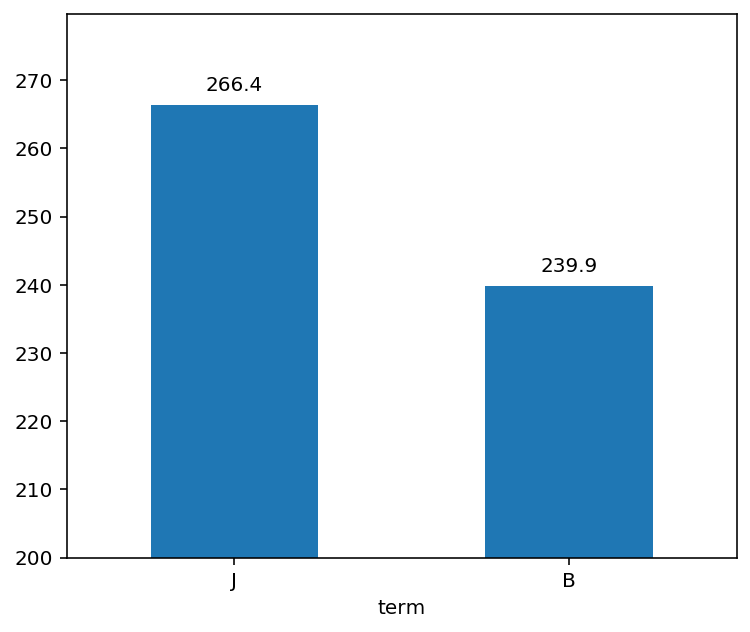

In [190]:
fig, ax = plt.subplots(figsize=(6,5))  # make one subplot (ax) on the figure 
courses.groupby('term')['course_length'].mean().sort_values(ascending=False).plot(kind='bar');

labels = courses.groupby('term')['course_length'].mean().sort_values(ascending=False).index
values = np.round(courses.groupby('term')['course_length'].mean().sort_values(ascending=False).values)
ax.set_xticklabels(labels=labels,rotation=0);
plt.ylim(ymin=200)
annotate(ax)

In [173]:

np.round(values)

array([266., 240.])

### EDA of Assessment Info

In [335]:
# Join Assessment and Student Assessment

stud_assess = student_assessement.set_index('id_assessment').join(assessments.set_index('id_assessment'), how='left').reset_index()

In [336]:
# Join with student info ('final_result')
stud_assess = student_info[['id_student', 'code_module', 'code_presentation', 'final_result']].\
                 set_index(['id_student', 'code_module', 'code_presentation']).\
        join(stud_assess.set_index(['id_student', 'code_module', 'code_presentation']), how='left').reset_index()

In [337]:
# Join with courses info ('lngth')
stud_assess = stud_assess.set_index(['code_module', 'code_presentation']).\
            join(courses.set_index(['code_module', 'code_presentation']), how='left').reset_index()

In [338]:
stud_assess.shape

(180662, 13)

In [343]:
student_assessement.shape

(173912, 5)

In [344]:
stud_assess.rename(columns={'module_presentation_length':"course_length"}, inplace=True)

In [345]:
stud_assess.head()

,code_module,code_presentation,id_student,final_result,id_assessment,date_submitted,is_banked,score,assessment_type,date,weight,course_length,term
0,AAA,2013J,11391,Pass,1752.0,18.0,0.0,78,TMA,19,10.0,268,J
1,AAA,2013J,11391,Pass,1753.0,53.0,0.0,85,TMA,54,20.0,268,J
2,AAA,2013J,11391,Pass,1754.0,115.0,0.0,80,TMA,117,20.0,268,J
3,AAA,2013J,11391,Pass,1755.0,164.0,0.0,85,TMA,166,20.0,268,J
4,AAA,2013J,11391,Pass,1756.0,212.0,0.0,82,TMA,215,30.0,268,J


##### Assessement Types

__CMA__ - Computer Marked Assignment: c

__TMA__ - Tutor Marked Assignment



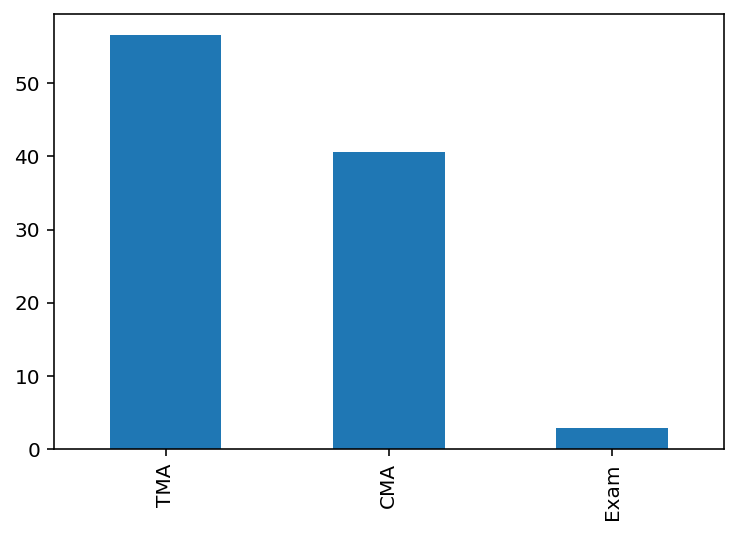

In [346]:
#Distribution of Assessment types
(stud_assess.assessment_type.value_counts(normalize=True)*100).plot(kind='bar');

In [347]:
pd.crosstab(stud_assess['code_module'], stud_assess['assessment_type'], normalize='index')

assessment_type,CMA,Exam,TMA
code_module,,,
AAA,0.000000,0.000000,1.000000
BBB,0.370840,0.000000,0.629160
CCC,0.515628,0.101109,0.383263
DDD,0.170166,0.098626,0.731208
EEE,0.000000,0.000000,1.000000
FFF,0.547150,0.000000,0.452850
GGG,0.628096,0.000000,0.371904


In [348]:
stud_assess['date'].replace('?', None, inplace=True)

In [352]:
stud_assess['date'].isna().sum()

6750

In [357]:
stud_assess_all = stud_assess.copy()
stud_assess = stud_assess[stud_assess['date'].isna()==False]

In [358]:
stud_assess['days_to_submission'] = stud_assess['date_submitted'].astype(int) - stud_assess['date'].astype(int)

<ipython-input-358-4fff5c02d95a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stud_assess['days_to_submission'] = stud_assess['date_submitted'].astype(int) - stud_assess['date'].astype(int)


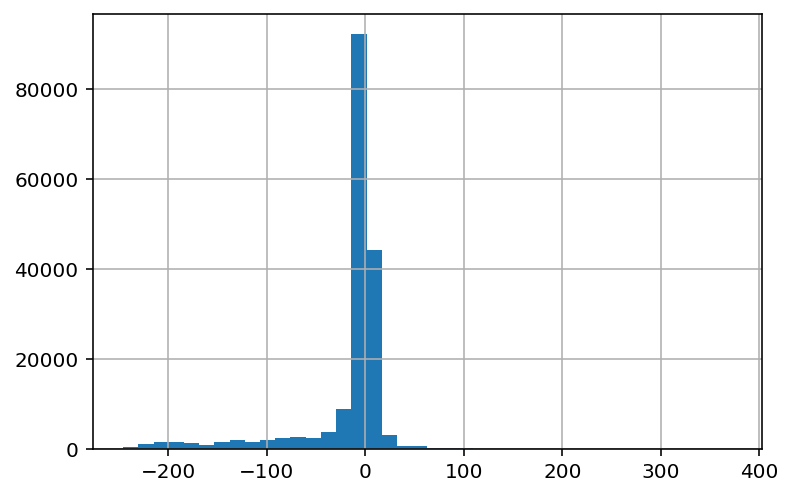

In [365]:
stud_assess['days_to_submission'].hist(bins=40);

In [366]:
stud_assess['days_to_submission'].quantile(0.9996)

176.0

In [367]:
stud_assess['days_to_submission'].quantile(0.001)

-237.0

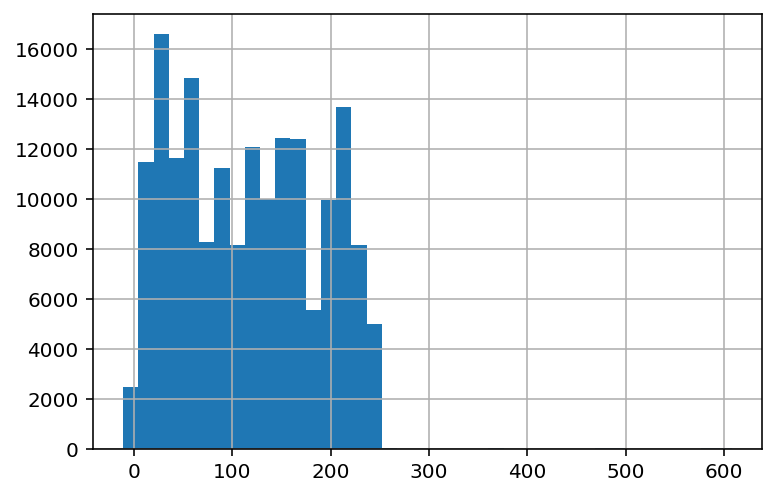

In [368]:
stud_assess['date_submitted'].hist(bins=40);

In [369]:
stud_assess['attempted_before_course'] = 0

stud_assess.loc[stud_assess['date_submitted'] < 0,'attempted_before_course'] = 1

In [370]:
stud_assess['attempted_after_course'] = 0

stud_assess.loc[stud_assess['date_submitted'] > stud_assess['course_length'],'attempted_after_course'] = 1

In [376]:
stud_assess.head()

,code_module,code_presentation,id_student,final_result,id_assessment,date_submitted,is_banked,score,assessment_type,date,weight,course_length,term,days_to_submission,attempted_before_course,attempted_after_course,attempted_timeline,withdrawn
0,AAA,2013J,11391,Pass,1752.0,18.0,0.0,78,TMA,19,10.0,268,J,-1,0,0,0,0
1,AAA,2013J,11391,Pass,1753.0,53.0,0.0,85,TMA,54,20.0,268,J,-1,0,0,0,0
2,AAA,2013J,11391,Pass,1754.0,115.0,0.0,80,TMA,117,20.0,268,J,-2,0,0,0,0
3,AAA,2013J,11391,Pass,1755.0,164.0,0.0,85,TMA,166,20.0,268,J,-2,0,0,0,0
4,AAA,2013J,11391,Pass,1756.0,212.0,0.0,82,TMA,215,30.0,268,J,-3,0,0,0,0


In [372]:
# Attempted timeline - 0 - within the course time, 1 -before the course started, 2 - after

stud_assess['attempted_timeline'] = stud_assess['attempted_before_course']  + 2*stud_assess['attempted_after_course']

In [373]:
pd.crosstab(stud_assess['final_result'], stud_assess['attempted_timeline'], normalize='columns')

attempted_timeline,0,1,2
final_result,,,
Distinction,0.152617,0.055421,0.011765
Fail,0.160721,0.415654,0.047059
Pass,0.613460,0.309674,0.117647
Withdrawn,0.073203,0.219251,0.823529


In [377]:
stud_assess['withdrawn'] = 0

In [387]:
stud_assess_withdrew = stud_assess[stud_assess['final_result']=='Withdrawn'].copy()

In [388]:
stud_assess_withdrew['withdrawn'] = 1

In [390]:
stud_assess_withdrew

,code_module,code_presentation,id_student,final_result,id_assessment,date_submitted,is_banked,score,assessment_type,date,weight,course_length,term,days_to_submission,attempted_before_course,attempted_after_course,attempted_timeline,withdrawn
71,AAA,2013J,65002,Withdrawn,1752.0,17.0,0.0,66,TMA,19,10.0,268,J,-2,0,0,0,1
72,AAA,2013J,65002,Withdrawn,1753.0,51.0,0.0,68,TMA,54,20.0,268,J,-3,0,0,0,1
102,AAA,2013J,94961,Withdrawn,1752.0,17.0,0.0,74,TMA,19,10.0,268,J,-2,0,0,0,1
133,AAA,2013J,106247,Withdrawn,1752.0,32.0,0.0,67,TMA,19,10.0,268,J,13,0,0,0,1
134,AAA,2013J,106247,Withdrawn,1753.0,64.0,0.0,66,TMA,54,20.0,268,J,10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180570,GGG,2014J,2342238,Withdrawn,37435.0,57.0,0.0,50,TMA,61,0.0,269,J,-4,0,0,0,1
180571,GGG,2014J,2357806,Withdrawn,37435.0,54.0,0.0,73,TMA,61,0.0,269,J,-7,0,0,0,1
180572,GGG,2014J,2357806,Withdrawn,37438.0,73.0,0.0,80,CMA,229,0.0,269,J,-156,0,0,0,1
180653,GGG,2014J,2679821,Withdrawn,37435.0,56.0,0.0,83,TMA,61,0.0,269,J,-5,0,0,0,1


In [393]:
stud_assess = pd.concat([stud_assess[stud_assess['final_result']!='Withdrawn'],stud_assess_withdrew ])

In [449]:

stud_assess_agg = stud_assess.groupby(['id_student','code_module', 'code_presentation']).\
agg({'id_assessment':'nunique', 'date_submitted':'last', 'days_to_submission':['mean', 'max', 'min'], \
    'withdrawn':'mean'}).reset_index()

In [450]:
stud_assess_agg = pd.DataFrame(stud_assess_agg.to_records())

In [495]:
stud_assess_agg.columns 

Index(['id_student', 'code_module', 'code_presentation',
       'num_assessments_taken', 'date_submitted_last',
       'mean_days_to_submission', 'max_days_to_submission',
       'min_days_to_submission', 'withdrawn'],
      dtype='object')

In [452]:
stud_assess_agg.drop('index', axis=1, inplace=True)

In [453]:
stud_assess_agg.columns=['id_student',
                        'code_module',
                        'code_presentation',
                        'num_assessments_taken',
                         'date_submitted_last',
                        'mean_days_to_submission',
                        'max_days_to_submission',
                         'min_days_to_submission',
                         'withdrawn'
                        ]

In [496]:
pd.crosstab([stud_assess_agg['code_module'],stud_assess_agg['code_presentation']], \
            stud_assess_agg['withdrawn'], values=stud_assess_agg['date_submitted_last'], aggfunc='mean')

withdrawn                               0           1
code_module code_presentation                        
AAA         2013J              207.231975   78.934783
            2014J              203.941781   88.958333
BBB         2013B              165.998268   82.518692
            2013J              180.962692   72.143541
            2014B              169.969582   68.176471
            2014J              180.943624   63.042904
CCC         2014B              194.982383   54.864444
            2014J              219.496746   56.456911
DDD         2013B              172.628993   78.119522
            2013J              211.409822   79.309816
            2014B              196.375723   71.341270
            2014J              219.298840   70.609121
EEE         2013J              145.724368   75.578947
            2014B              135.275210   62.283333
            2014J              153.162651   59.561905
FFF         2013B              175.914783   83.058824
            2013J              179.779727   74.755224
            2014B              172.191753   71.283898
            2014J              192.929059   51.047745
GGG         2013J              200.115482  104.193548
            2014B              192.655864  105.682927
            2014J              203.047619   91.324324

In [ ]:
stud_assess_agg['ass']

In [464]:
stud_assess = stud_assess.drop('withdrawn', axis=1).set_index(['id_student', 'code_module', 'code_presentation']).join(stud_assess_agg.\
                                                                             set_index(['id_student', 'code_module', 'code_presentation']), how='left').reset_index()

In [457]:
#stud_assess_agg.pivot_table(index=['code_module', 'code_presentation'], \
 #                           columns='withdrawn', aggfunc={'date_submitted_last':'mean'})

In [465]:
stud_assess.columns 

Index(['id_student', 'code_module', 'code_presentation', 'final_result',
       'id_assessment', 'date_submitted', 'is_banked', 'score',
       'assessment_type', 'date', 'weight', 'course_length', 'term',
       'days_to_submission', 'attempted_before_course',
       'attempted_after_course', 'attempted_timeline', 'num_assessments_taken',
       'date_submitted_last', 'mean_days_to_submission',
       'max_days_to_submission', 'min_days_to_submission', 'withdrawn'],
      dtype='object')

In [466]:
cols = ['id_student', 'code_module', 'code_presentation', 'final_result',
       'id_assessment', 'date_submitted', 'is_banked', 'score',
       'assessment_type', 'date', 'weight', 'course_length', 'term',
       'days_to_submission', 'num_assessments_taken',
       'date_submitted_last', 'withdrawn']

In [503]:
stud_assess[(stud_assess['date_submitted'] ==stud_assess['date_submitted_last']) &\
           (stud_assess['withdrawn']==1)]['assessment_type'].value_counts()

TMA     2710
CMA     2382
Exam       1
Name: assessment_type, dtype: int64

In [475]:
stud_assess[cols][stud_assess['id_student']==6516]

,id_student,code_module,code_presentation,final_result,id_assessment,date_submitted,is_banked,score,assessment_type,date,weight,course_length,term,days_to_submission,num_assessments_taken,date_submitted_last,withdrawn
0,6516,AAA,2014J,Pass,1758.0,17.0,0.0,60,TMA,19,10.0,269,J,-2,5,210.0,0
1,6516,AAA,2014J,Pass,1759.0,51.0,0.0,48,TMA,54,20.0,269,J,-3,5,210.0,0
2,6516,AAA,2014J,Pass,1760.0,116.0,0.0,63,TMA,117,20.0,269,J,-1,5,210.0,0
3,6516,AAA,2014J,Pass,1761.0,164.0,0.0,61,TMA,166,20.0,269,J,-2,5,210.0,0
4,6516,AAA,2014J,Pass,1762.0,210.0,0.0,77,TMA,215,30.0,269,J,-5,5,210.0,0


In [474]:
stud_assess[cols][stud_assess['id_student']==8462]

,id_student,code_module,code_presentation,final_result,id_assessment,date_submitted,is_banked,score,assessment_type,date,weight,course_length,term,days_to_submission,num_assessments_taken,date_submitted_last,withdrawn
5,8462,DDD,2013J,Withdrawn,25348.0,29.0,0.0,93,TMA,25,10.0,261,J,4,3,85.0,1
6,8462,DDD,2013J,Withdrawn,25349.0,51.0,0.0,83,TMA,53,12.5,261,J,-2,3,85.0,1
7,8462,DDD,2013J,Withdrawn,25350.0,85.0,0.0,87,TMA,88,17.5,261,J,-3,3,85.0,1
8,8462,DDD,2014J,Withdrawn,25362.0,-1.0,1.0,93,TMA,20,5.0,262,J,-21,4,-1.0,1
9,8462,DDD,2014J,Withdrawn,25363.0,-1.0,1.0,83,TMA,41,10.0,262,J,-42,4,-1.0,1
10,8462,DDD,2014J,Withdrawn,25364.0,-1.0,1.0,83,TMA,62,10.0,262,J,-63,4,-1.0,1
11,8462,DDD,2014J,Withdrawn,25365.0,-1.0,1.0,87,TMA,111,25.0,262,J,-112,4,-1.0,1


In [477]:
stud_assess[cols][(stud_assess['withdrawn']==1) & (stud_assess['code_module']=='CCC') &\
                 (stud_assess['code_presentation']=='2014B')]

,id_student,code_module,code_presentation,final_result,id_assessment,date_submitted,is_banked,score,assessment_type,date,weight,course_length,term,days_to_submission,num_assessments_taken,date_submitted_last,withdrawn
911,45664,CCC,2014B,Withdrawn,24282.0,39.0,0.0,52,TMA,32,9.0,241,B,7,3,69.0,1
912,45664,CCC,2014B,Withdrawn,24286.0,20.0,0.0,0,CMA,18,2.0,241,B,2,3,69.0,1
913,45664,CCC,2014B,Withdrawn,24287.0,69.0,0.0,43,CMA,67,7.0,241,B,2,3,69.0,1
1072,50263,CCC,2014B,Withdrawn,24282.0,34.0,0.0,66,TMA,32,9.0,241,B,2,2,20.0,1
1073,50263,CCC,2014B,Withdrawn,24286.0,20.0,0.0,20,CMA,18,2.0,241,B,2,2,20.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173226,2681198,CCC,2014B,Withdrawn,24287.0,69.0,0.0,48,CMA,67,7.0,241,B,2,3,69.0,1
173894,2698535,CCC,2014B,Withdrawn,24283.0,102.0,0.0,23,TMA,102,22.0,241,B,0,4,139.0,1
173895,2698535,CCC,2014B,Withdrawn,24286.0,20.0,0.0,20,CMA,18,2.0,241,B,2,4,139.0,1
173896,2698535,CCC,2014B,Withdrawn,24287.0,69.0,0.0,41,CMA,67,7.0,241,B,2,4,139.0,1


In [480]:
stud_assess[cols][(stud_assess['final_result']=='Fail') & (stud_assess['code_module']=='CCC') &\
                 (stud_assess['code_presentation']=='2014B')]

,id_student,code_module,code_presentation,final_result,id_assessment,date_submitted,is_banked,score,assessment_type,date,weight,course_length,term,days_to_submission,num_assessments_taken,date_submitted_last,withdrawn
213,28418,CCC,2014B,Fail,24286.0,20.0,0.0,30,CMA,18,2.0,241,B,2,2,69.0,0
214,28418,CCC,2014B,Fail,24287.0,69.0,0.0,33,CMA,67,7.0,241,B,2,2,69.0,0
1643,62278,CCC,2014B,Fail,24282.0,32.0,0.0,72,TMA,32,9.0,241,B,0,6,139.0,0
1644,62278,CCC,2014B,Fail,24283.0,102.0,0.0,75,TMA,102,22.0,241,B,0,6,139.0,0
1645,62278,CCC,2014B,Fail,24284.0,151.0,0.0,56,TMA,151,22.0,241,B,0,6,139.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172947,2668550,CCC,2014B,Fail,24288.0,140.0,0.0,24,CMA,137,8.0,241,B,3,3,140.0,0
173122,2677969,CCC,2014B,Fail,24282.0,31.0,0.0,88,TMA,32,9.0,241,B,-1,4,69.0,0
173123,2677969,CCC,2014B,Fail,24283.0,101.0,0.0,25,TMA,102,22.0,241,B,-1,4,69.0,0
173124,2677969,CCC,2014B,Fail,24286.0,20.0,0.0,70,CMA,18,2.0,241,B,2,4,69.0,0


In [398]:
stud_assess_all['id_student'].nunique()

28785

In [400]:
stud_assess['id_student'].nunique()

23369

In [401]:
len(student_info['id_student'].unique())

28785

In [326]:
stud_assess['withdrawn'].mean()

0.07529670178021068

##### If assignements were attempted after a course end, there was a big chance of  withdrawing from the course

In [62]:
stud_assess.id_assessment.value_counts()

24295    1917
34873    1859
34899    1826
15020    1776
14996    1695
         ... 
1760      304
1755      303
1756      298
1761      280
1762      278
Name: id_assessment, Length: 188, dtype: int64

### Assessments 

In [64]:
assessments.groupby('code_module').size()

code_module
AAA    12
BBB    42
CCC    20
DDD    35
EEE    15
FFF    52
GGG    30
dtype: int64

In [208]:
# Courses_assessments

course_assess = courses.set_index(['code_module', 'code_presentation']).\
                join(assessments.set_index(['code_module', 'code_presentation']), how='left').reset_index()


In [233]:
course_assess['date'].replace('?',None, inplace=True)

In [234]:

course_assess['date'] = course_assess['date'].astype(int)

In [235]:
course_assess.sort_values(by=['code_module','date'])

,code_module,code_presentation,course_length,term,id_assessment,assessment_type,date,weight
0,AAA,2013J,268,J,1752,TMA,19,10.0
6,AAA,2014J,269,J,1758,TMA,19,10.0
1,AAA,2013J,268,J,1753,TMA,54,20.0
7,AAA,2014J,269,J,1759,TMA,54,20.0
2,AAA,2013J,268,J,1754,TMA,117,20.0
...,...,...,...,...,...,...,...,...
198,GGG,2014J,269,J,37440,CMA,229,0.0
199,GGG,2014J,269,J,37441,CMA,229,0.0
200,GGG,2014J,269,J,37442,CMA,229,0.0
201,GGG,2014J,269,J,37443,CMA,229,0.0


In [210]:
course_assess['term'] = course_assess['code_presentation'].str.strip().str[-1]

In [219]:
# Variety of assessmnet
course_assess[course_assess['code_presentation'].isin(['2014B', '2014J'])].groupby(['code_module', 'code_presentation'])['id_assessment'].count()

code_module  code_presentation
AAA          2014J                 6
BBB          2014B                12
             2014J                 6
CCC          2014B                10
             2014J                10
DDD          2014B                 7
             2014J                 7
EEE          2014B                 5
             2014J                 5
FFF          2014B                13
             2014J                13
GGG          2014B                10
             2014J                10
Name: id_assessment, dtype: int64

In [222]:
course_assess_2014 = course_assess[course_assess['code_presentation'].isin(['2014B', '2014J'])]

In [228]:
# Distribution of assessments by modules in 2014
pd.crosstab([course_assess_2014['code_module'], course_assess_2014['code_presentation']], \
            course_assess_2014['assessment_type'], normalize='index')

assessment_type                     CMA      Exam       TMA
code_module code_presentation                              
AAA         2014J              0.000000  0.166667  0.833333
BBB         2014B              0.416667  0.083333  0.500000
            2014J              0.000000  0.166667  0.833333
CCC         2014B              0.400000  0.200000  0.400000
            2014J              0.400000  0.200000  0.400000
DDD         2014B              0.000000  0.142857  0.857143
            2014J              0.000000  0.142857  0.857143
EEE         2014B              0.000000  0.200000  0.800000
            2014J              0.000000  0.200000  0.800000
FFF         2014B              0.538462  0.076923  0.384615
            2014J              0.538462  0.076923  0.384615
GGG         2014B              0.600000  0.100000  0.300000
            2014J              0.600000  0.100000  0.300000

In [240]:
course_assess_2013 = course_assess[course_assess['code_presentation'].isin(['2013B', '2013J'])]

In [241]:
# Distribution of assessments by modules in 2013
pd.crosstab([course_assess_2013['code_module'], course_assess_2013['code_presentation']], \
            course_assess_2013['assessment_type'], normalize='index')

assessment_type                     CMA      Exam       TMA
code_module code_presentation                              
AAA         2013J              0.000000  0.166667  0.833333
BBB         2013B              0.416667  0.083333  0.500000
            2013J              0.416667  0.083333  0.500000
DDD         2013B              0.500000  0.071429  0.428571
            2013J              0.000000  0.142857  0.857143
EEE         2013J              0.000000  0.200000  0.800000
FFF         2013B              0.538462  0.076923  0.384615
            2013J              0.538462  0.076923  0.384615
GGG         2013J              0.600000  0.100000  0.300000

__NOTES__:

- Course CCC appeared in 2014 only. It has highest withdrawal rate of 44.5%. 40% of assessments is TMA, 40% - CMA. _Higher withdrawal in 2014B (46%) vs 2014J (43%)_

- Course DDD: 36% withdrawal rate, in 2013B had 50/42% allocation between CMA/TMA assessments; in 2014 86% of assessments was TMA, 0 CMA! 
    
    _Highest withdrawal in 2014B (40%) vs ~35-36% in  2013J and 2014J, 33% in 2013B._
    In 2013B assessment was more evenly distributed between the CMA and TMA, and that was the term with more even distribution between assessments

- However, a course AAA ( 17% withdrawal) also had the vast majority of assessments TMA (83%)

- Course FFF:  31% withdrawal rate ; 
    stark difference in withdrawals in 2014J  (36%) vs 31% in 2014B and 29.5% in 2013J and 25% in 2013B.
    Assessment structure unchanged - 53% to CMA, 39% - TMA



- Course BBB (30.2%) - assssment structure changed for 2014J (32.6% withdrawal) with 83% of assessments going to TMA. Withdrawal rates incresed by 2.5ppt


__Conclusion:__ there seems to bee an uptick in withdrawal rates for courses DDD and BBB, when the assessment structure chnages from balanced (between CMA and TMA) to more  skewed toward TMA. 

Most problematic modules:

- CCC_2014B (46.4%)

- CCC_2014J (43%)

- DDD_2014B (40%)

- FFF_2014J (36%)

- DDD_ 2014J (36%)


In [304]:
modules_outcomes.sort_values(by='withdrawal_rate', ascending=False)

,code_module,code_presentation,distinction,fail,pass,withdrawn,total,withdrawal_rate,fail_rate,pass_rate,distinction_rate
6,CCC,2014B,192,375,471,898,1936,0.463843,0.193698,0.243285,0.099174
7,CCC,2014J,306,406,709,1077,2498,0.431145,0.162530,0.283827,0.122498
10,DDD,2014B,119,259,360,490,1228,0.399023,0.210912,0.293160,0.096906
18,FFF,2014J,258,393,859,855,2365,0.361522,0.166173,0.363214,0.109091
11,DDD,2014J,112,364,680,647,1803,0.358846,0.201886,0.377149,0.062119
9,DDD,2013J,98,428,731,681,1938,0.351393,0.220846,0.377193,0.050568
8,DDD,2013B,54,361,456,432,1303,0.331543,0.277053,0.349962,0.041443
5,BBB,2014J,180,391,972,749,2292,0.326789,0.170593,0.424084,0.078534
17,FFF,2014B,107,384,547,462,1500,0.308000,0.256000,0.364667,0.071333
4,BBB,2014B,166,396,561,490,1613,0.303782,0.245505,0.347799,0.102914


In [253]:
course_assess ['course'] = course_assess['code_module'] + '_'+ course_assess['code_presentation']

In [295]:
def plot_hist_grid_df(df, col_values, target_col):
    if len(df[col_values].unique())%2 ==0:
        nrows = int(len(df[col_values].unique())/2)
    else:
        nrows = len(df[col_values].unique())//2 + 1
        
    fig, axes = plt.subplots(nrows=nrows, ncols=2, figsize=(8,20))  # make one subplot (ax) on the figure
    axes = axes.flatten() # it comes out as a 2D matrix; convert to a vector


    for i in range(len(df[col_values].sort_values().unique())):
        axes[i].hist(df[df[col_values]==df[col_values].sort_values().unique()[i]][target_col])
        axes[i].set_title(df[col_values].sort_values().unique()[i]);
    plt.tight_layout() # I add this anytime I have a grid as it "does the right thing"
    plt.show();

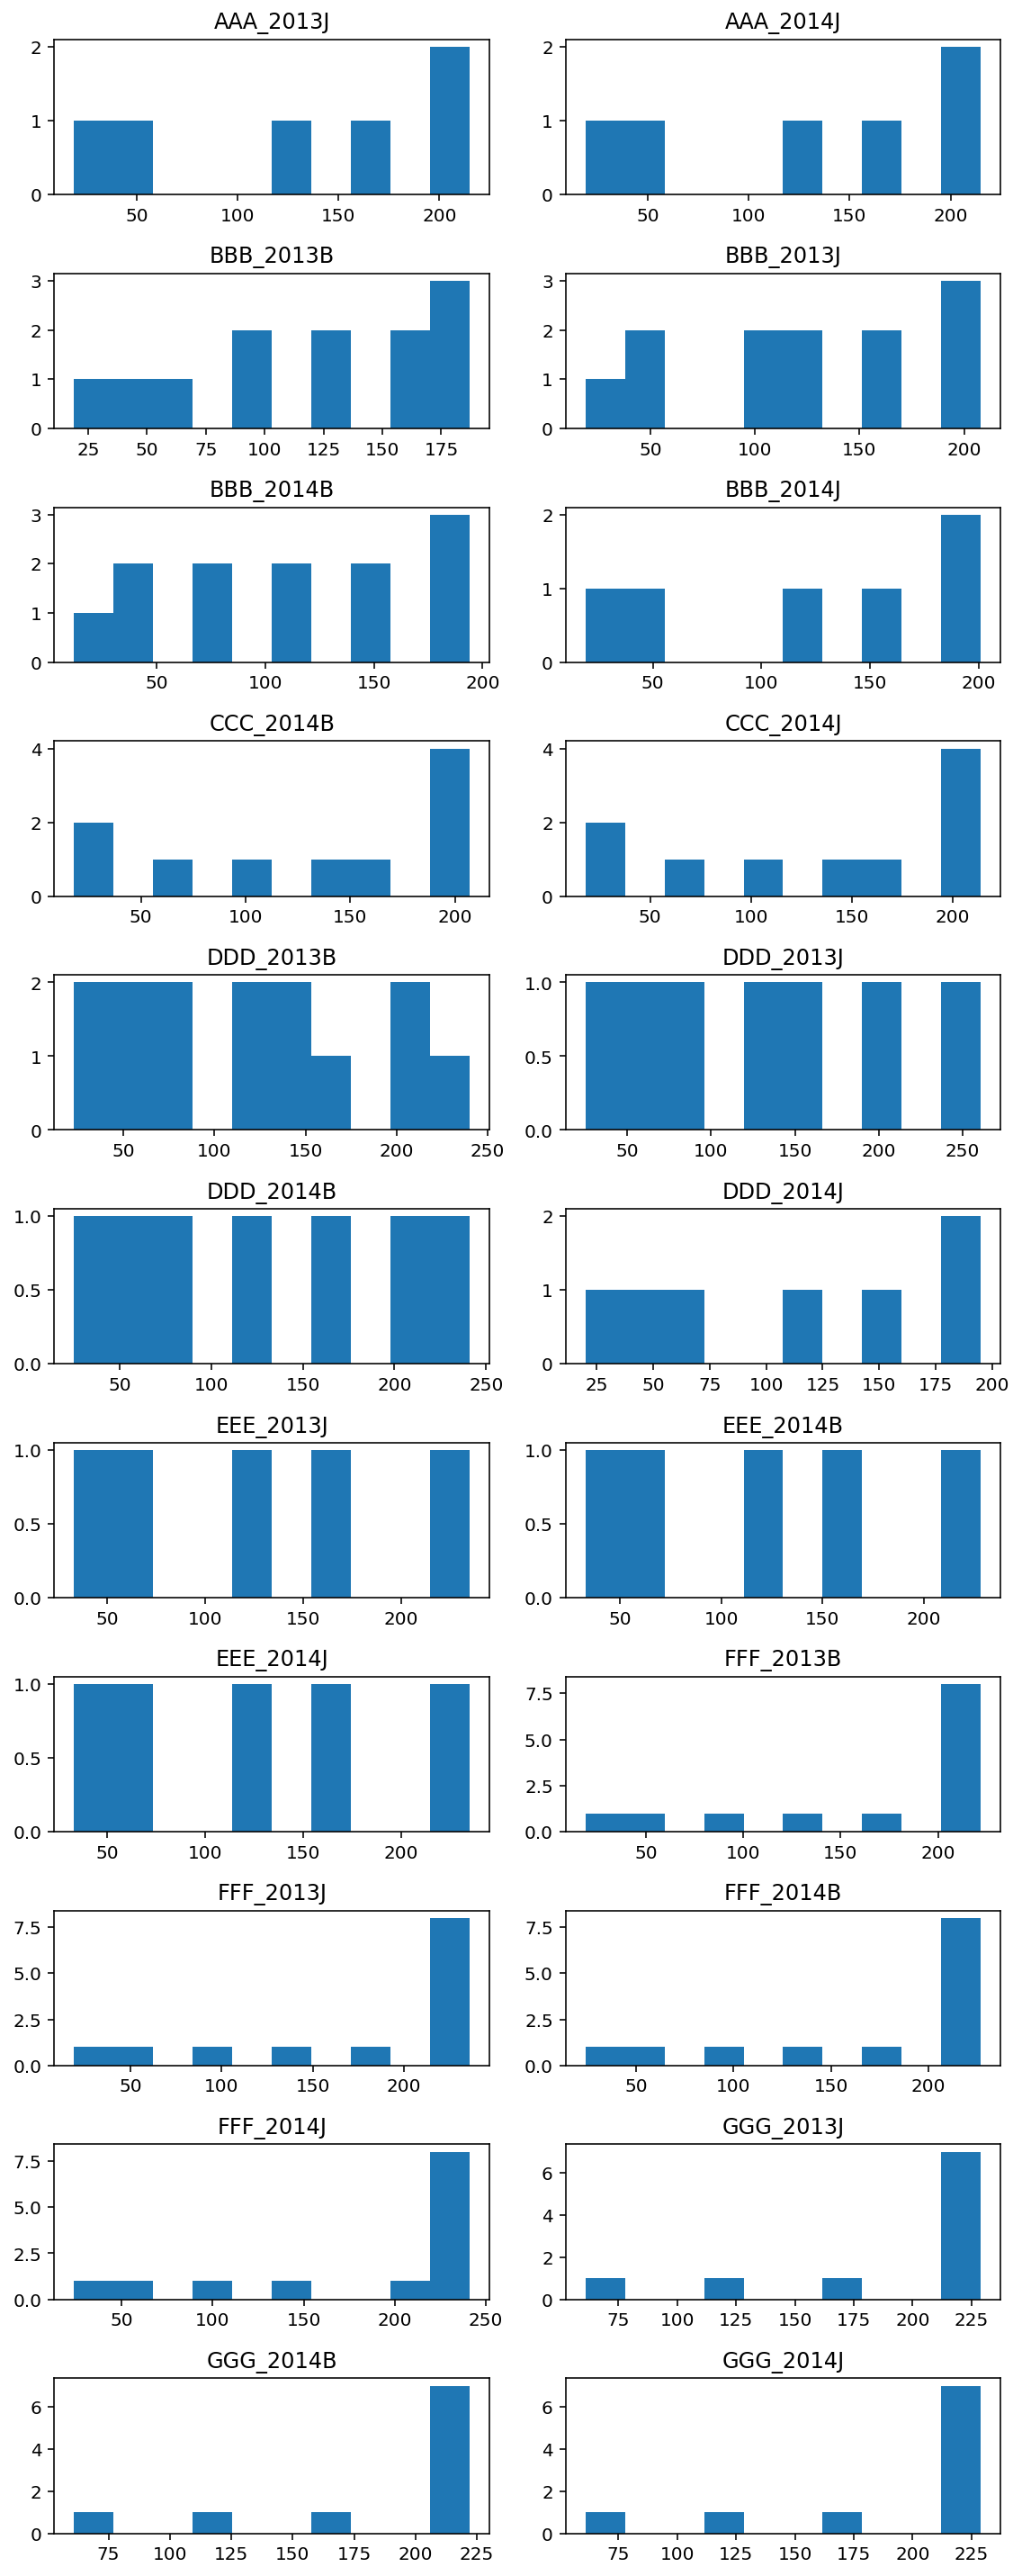

In [296]:
 plot_hist_grid_df(course_assess, 'course', 'date')

In [301]:
# Number of assessments
course_assess.groupby('course')['id_assessment'].count().reset_index().sort_values(by = ['id_assessment', 'course'], ascending=False)

,course,id_assessment
8,DDD_2013B,14
18,FFF_2014J,13
17,FFF_2014B,13
16,FFF_2013J,13
15,FFF_2013B,13
4,BBB_2014B,12
3,BBB_2013J,12
2,BBB_2013B,12
21,GGG_2014J,10
20,GGG_2014B,10


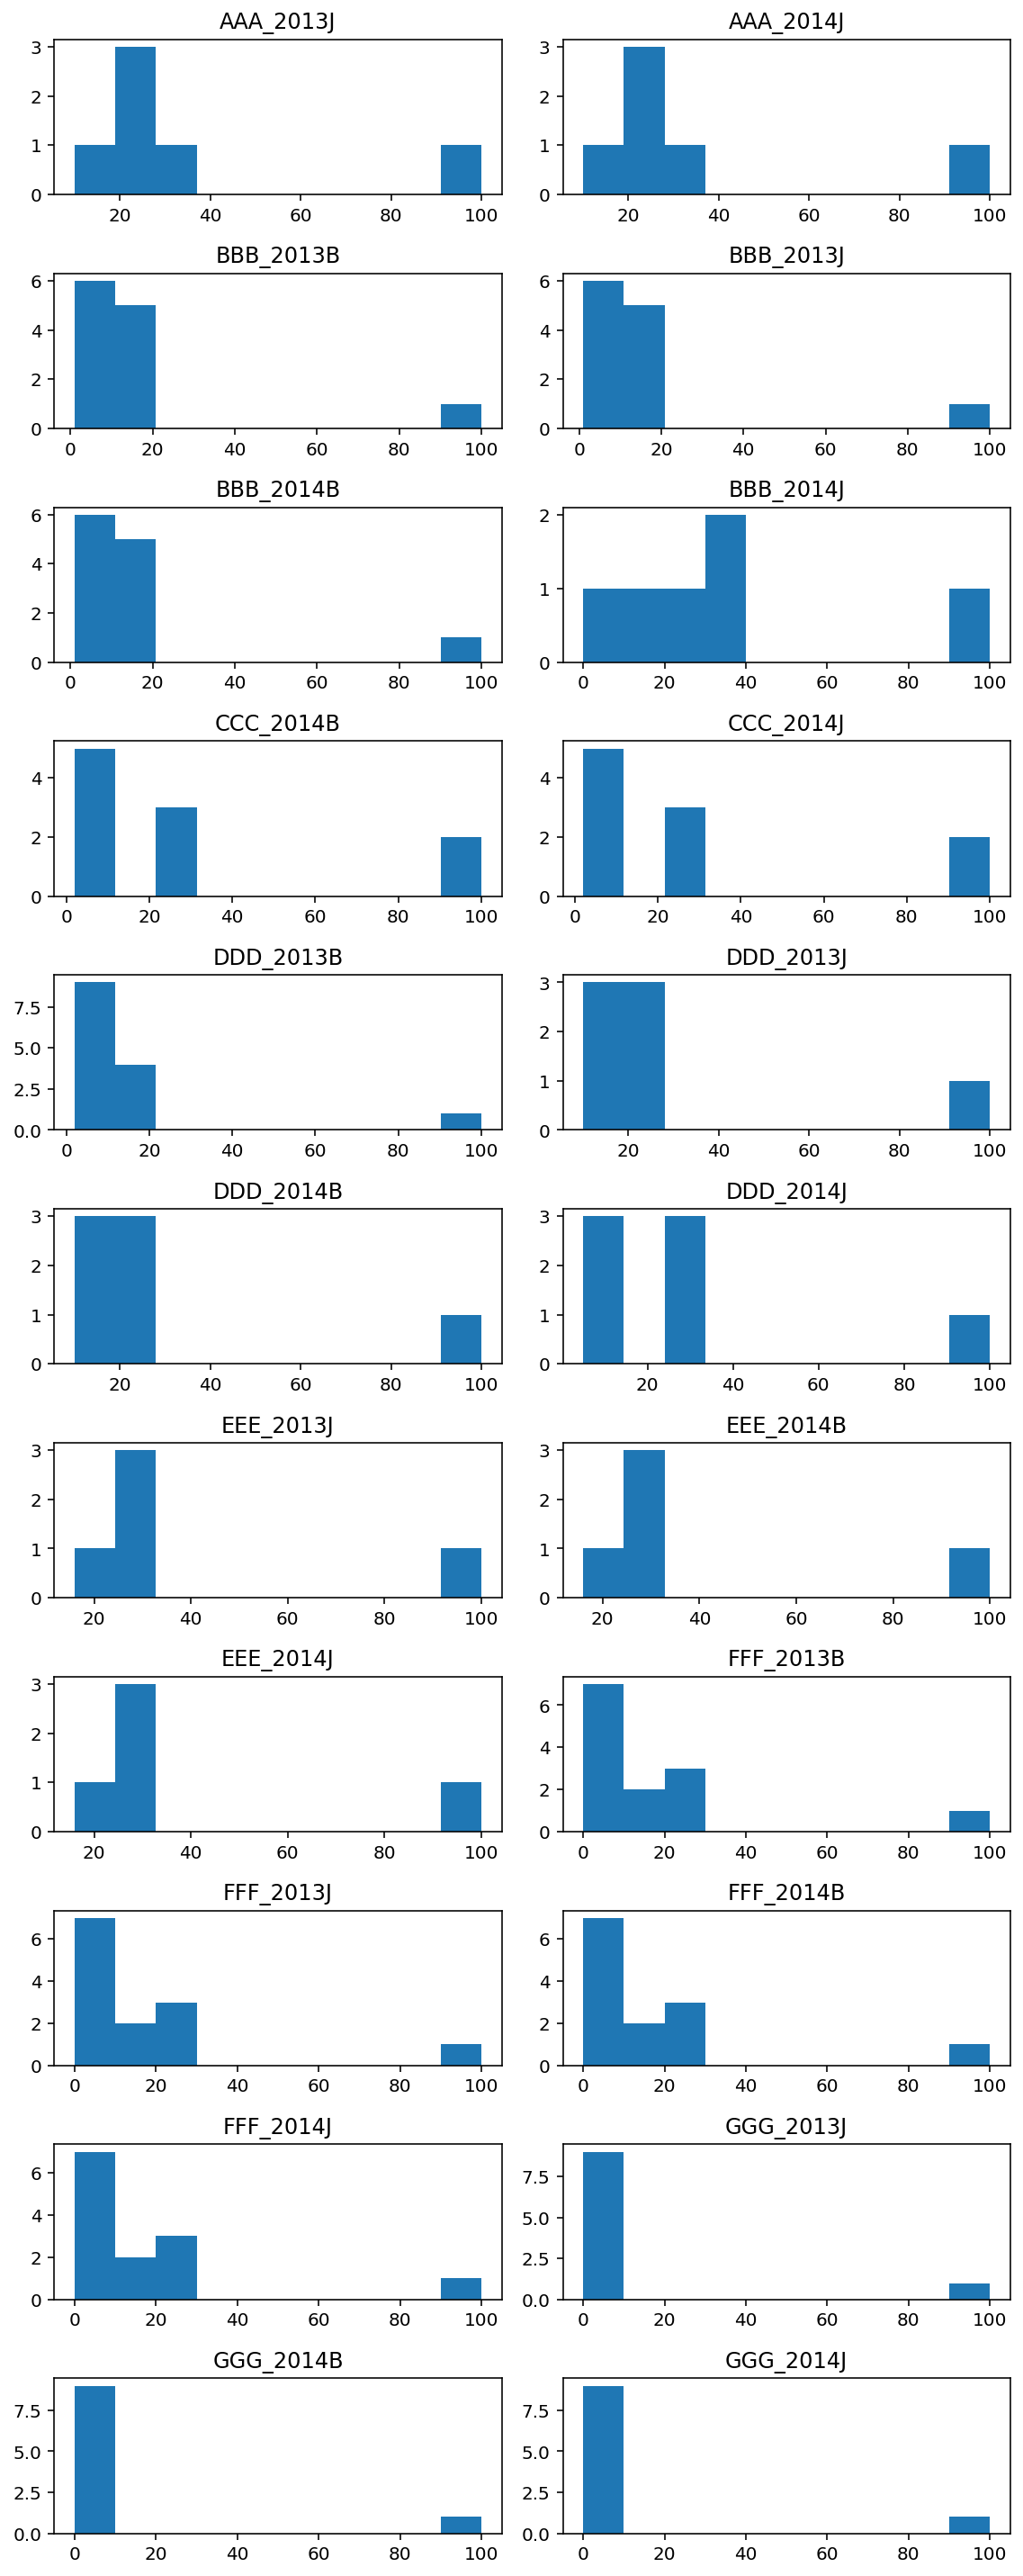

In [297]:
plot_hist_grid_df(course_assess, 'course', 'weight')

In [279]:
stud_assess.head()

,code_module,code_presentation,id_student,id_assessment,date_submitted,is_banked,score,assessment_type,date,weight,final_result,course_length,days_to_submission,attempted_before_course,attempted_after_course,attempted_timeline,term
0,AAA,2013J,11391,1752,18,0,78,TMA,19,10.0,Pass,268,-1,0,0,0,J
1,AAA,2013J,11391,1753,53,0,85,TMA,54,20.0,Pass,268,-1,0,0,0,J
2,AAA,2013J,11391,1754,115,0,80,TMA,117,20.0,Pass,268,-2,0,0,0,J
3,AAA,2013J,11391,1755,164,0,85,TMA,166,20.0,Pass,268,-2,0,0,0,J
4,AAA,2013J,11391,1756,212,0,82,TMA,215,30.0,Pass,268,-3,0,0,0,J


In [247]:
modules_outcomes.sort_values(by='withdrawal_rate', ascending=False)

,code_module,code_presentation,distinction,fail,pass,withdrawn,total,withdrawal_rate,fail_rate,pass_rate,distinction_rate
6,CCC,2014B,192,375,471,898,1936,0.463843,0.193698,0.243285,0.099174
7,CCC,2014J,306,406,709,1077,2498,0.431145,0.162530,0.283827,0.122498
10,DDD,2014B,119,259,360,490,1228,0.399023,0.210912,0.293160,0.096906
18,FFF,2014J,258,393,859,855,2365,0.361522,0.166173,0.363214,0.109091
11,DDD,2014J,112,364,680,647,1803,0.358846,0.201886,0.377149,0.062119
9,DDD,2013J,98,428,731,681,1938,0.351393,0.220846,0.377193,0.050568
8,DDD,2013B,54,361,456,432,1303,0.331543,0.277053,0.349962,0.041443
5,BBB,2014J,180,391,972,749,2292,0.326789,0.170593,0.424084,0.078534
17,FFF,2014B,107,384,547,462,1500,0.308000,0.256000,0.364667,0.071333
4,BBB,2014B,166,396,561,490,1613,0.303782,0.245505,0.347799,0.102914


### Predicting Student Withdrawal


In [541]:
student_info.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


In [542]:
student_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32593 non-null  object
 1   code_presentation     32593 non-null  object
 2   id_student            32593 non-null  int64 
 3   gender                32593 non-null  object
 4   region                32593 non-null  object
 5   highest_education     32593 non-null  object
 6   imd_band              32593 non-null  object
 7   age_band              32593 non-null  object
 8   num_of_prev_attempts  32593 non-null  int64 
 9   studied_credits       32593 non-null  int64 
 10  disability            32593 non-null  object
 11  final_result          32593 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


In [543]:

student_info['imd_band'].value_counts(normalize=True)

20-30%     0.112110
30-40%     0.108582
10-20      0.107876
0-10%      0.101586
40-50%     0.099899
50-60%     0.095849
60-70%     0.089130
70-80%     0.088332
80-90%     0.084742
90-100%    0.077808
?          0.034087
Name: imd_band, dtype: float64

In [536]:
# Number of missing values
for col in student_info.columns:
    print(col, len(student_info[student_info[col]=='?']))

code_module 0
code_presentation 0
id_student 0
gender 0
region 0
highest_education 0
imd_band 1111
age_band 0
num_of_prev_attempts 0
studied_credits 0
disability 0
final_result 0


/Users/mariavasilenko/opt/anaconda3/envs/dc/lib/python3.8/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [535]:
student_info.replace('?',np.nan).isna().sum()

code_module                0
code_presentation          0
id_student                 0
gender                     0
region                     0
highest_education          0
imd_band                1111
age_band                   0
num_of_prev_attempts       0
studied_credits            0
disability                 0
final_result               0
dtype: int64

In [520]:
pd.crosstab(student_info['final_result'], student_info['imd_band'], normalize='columns')

imd_band,0-10%,10-20,20-30%,30-40%,40-50%,50-60%,60-70%,70-80%,80-90%,90-100%,?
final_result,,,,,,,,,,,
Distinction,0.050740,0.054323,0.071976,0.089008,0.089988,0.095070,0.102926,0.108718,0.118755,0.141167,0.179118
Fail,0.276654,0.259386,0.230980,0.221532,0.214066,0.224392,0.185198,0.208058,0.179218,0.166009,0.130513
Pass,0.300815,0.331911,0.335523,0.380051,0.375921,0.392766,0.416179,0.406391,0.421796,0.434148,0.477948
Withdrawn,0.371791,0.354380,0.361522,0.309409,0.320025,0.287772,0.295697,0.276832,0.280232,0.258675,0.212421


In [528]:
pd.crosstab(student_info['region'], student_info['imd_band'], normalize='columns')

imd_band,0-10%,10-20,20-30%,30-40%,40-50%,50-60%,60-70%,70-80%,80-90%,90-100%,?
region,,,,,,,,,,,
East Anglian Region,0.031108,0.046359,0.083744,0.102854,0.126229,0.117798,0.137694,0.142758,0.145185,0.162855,0.000000
East Midlands Region,0.054666,0.087600,0.075534,0.071772,0.073710,0.076184,0.080895,0.072247,0.090876,0.068612,0.000000
Ireland,0.036847,0.031854,0.022167,0.025713,0.022420,0.034571,0.029948,0.030566,0.030413,0.028391,0.239424
London Region,0.110843,0.196246,0.162288,0.130545,0.094902,0.080986,0.059208,0.049670,0.053222,0.031546,0.000000
North Region,0.056176,0.069113,0.039683,0.033908,0.032862,0.021127,0.024096,0.026398,0.025706,0.003155,0.657966
North Western Region,0.220477,0.105802,0.110564,0.091269,0.070332,0.077145,0.062651,0.067385,0.052498,0.031940,0.004500
Scotland,0.084265,0.079352,0.098248,0.106245,0.111179,0.128681,0.129088,0.116013,0.127806,0.124211,0.010801
South East Region,0.017517,0.044084,0.057471,0.068663,0.070332,0.077145,0.100516,0.071553,0.085807,0.094637,0.000000
South Region,0.011477,0.041240,0.056377,0.059621,0.104423,0.105314,0.090189,0.134074,0.165098,0.264590,0.043204


In [544]:
# Defining most deprived as belonging to imd_band <=30%
student_info['most_deprived'] = 0
student_info['most_deprived'] = np.where(student_info['imd_band'].isin(['0-10%', '10-20', '20-30%']), 1, 0)

In [545]:
# Defining least deprived as belonging to imd_band <=30%
student_info['least_deprived'] = 0
student_info['least_deprived'] = np.where(student_info['imd_band'].isin(['70-80%', '80-90%', '90-100%']), 1, 0)

In [546]:
# Defining withdrawal

student_info['withdrawn'] = np.where(student_info['final_result']=='Withdrawn', 1, 0)

In [ ]:
student_info['']

In [547]:
student_info_dummies = pd.get_dummies(student_info, columns=['gender','region', 'age_band', 'disability', 'highest_education'],\
               drop_first=True)
#obj_df, columns=["body_style", "drive_wheels"], prefix=["body", "drive"]

In [549]:
student_info_dummies.columns

Index(['code_module', 'code_presentation', 'id_student', 'imd_band',
       'num_of_prev_attempts', 'studied_credits', 'final_result',
       'most_deprived', 'least_deprived', 'withdrawn', 'gender_M',
       'region_East Midlands Region', 'region_Ireland', 'region_London Region',
       'region_North Region', 'region_North Western Region', 'region_Scotland',
       'region_South East Region', 'region_South Region',
       'region_South West Region', 'region_Wales',
       'region_West Midlands Region', 'region_Yorkshire Region',
       'age_band_35-55', 'age_band_55<=', 'disability_Y',
       'highest_education_HE Qualification',
       'highest_education_Lower Than A Level',
       'highest_education_No Formal quals',
       'highest_education_Post Graduate Qualification'],
      dtype='object')

In [550]:
cols_drop = ['code_module', 'code_presentation', 'id_student', 'imd_band','final_result']

### EDA of VLE and S